In [2]:
# Getting from the notebook dir so we can access src...
import sys
sys.path.append("..")
# --------------------------------------------
from src.classifiers.classifier_baseline import BaselineClassifier as Classifier
from src.preprocess.data_prep_baseline import DataPrepBaseline
from sklearn.metrics import classification_report

In [3]:
c = Classifier(
    class_weight_1='balanced', 
    class_weight_2='balanced', 
    class_weight_3='balanced',
    penalty_1='l1', 
    penalty_2='l2', 
    penalty_3='l2', 
    c_1=0.01, 
    c_2=0.01,
    c_3=0.01,
    loss_function='squared_hinge',
    multi_class='ovr',
)

dp = DataPrepBaseline(language='english')

# Subtask A

In [4]:
# Read in the start-kit training set into a pandas dataframe
# - Note: the file path has to be an absolute path from the current file
dataframe = dp.tsv_to_dataframe(
    '../data/raw/OffensEval2019/start-kit/training-v1/offenseval-training-v1.tsv')

In [5]:
# Transform 'OFF' to 1 and 'NOT' to 0
dataframe = dp.transform_class_column_to_ints(
    dataframe=dataframe, 
    column_name='subtask_a',
    mapping={'OFF': 1, 'NOT': 0},
)
# Extract X, y and feature names for subtask A
X, y, feature_names = dp.get_X_y_feature_names(
    dataset=dataframe, 
    tweet_column_name='tweet',
    y_column_name='subtask_a',
)
print(X[0], y[0], feature_names[0])

/Users/gudbjartursigurbergsson/PythonEnv/thesis/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['b', 'c', 'e', 'f', 'g', 'h', 'j', 'l', 'n', 'p', 'r', 'u', 'v', 'w'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


0        0.000000
1        0.000000
2        0.000000
3        0.000000
4        2.806102
5        1.403051
6        0.000000
7        2.806102
8        1.403051
9        1.403051
10       0.000000
11       2.806102
12       1.403051
13       0.000000
14       1.403051
15       0.000000
16       2.806102
17       0.000000
18       2.806102
19       0.000000
20       1.403051
21       0.000000
22       1.403051
23       0.000000
24       5.612204
25       1.403051
26       0.000000
27       0.000000
28       1.403051
29       4.209153
           ...   
13210    0.000000
13211    1.403051
13212    1.403051
13213    0.000000
13214    4.209153
13215    1.403051
13216    1.403051
13217    0.000000
13218    0.000000
13219    2.806102
13220    4.209153
13221    1.403051
13222    7.015256
13223    8.418307
13224    0.000000
13225    0.000000
13226    0.000000
13227    0.000000
13228    4.209153
13229    2.806102
13230    7.015256
13231    1.403051
13232    1.403051
13233    0.000000
13234    0

In [6]:
# Train a model on the whole training dataset
model, X_ = c.fit(X, y)
print(model.get_params())

/Users/gudbjartursigurbergsson/PythonEnv/thesis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gudbjartursigurbergsson/PythonEnv/thesis/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


{'C': 0.01, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 100, 'multi_class': 'warn', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


/Users/gudbjartursigurbergsson/PythonEnv/thesis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [6]:
# Get Predicted y's
y_pred = c.predict(X_, model)

In [8]:
# Calculate some metrics..
confusion_df_sub_a = c.confusion_matrix(
    y_true=y,
    y_pred=y_pred,
    num_categories=2,
    names=['NOT', 'OFF'],
)
f1_score_sub_a = c.f1_score(y, y_pred)
recall_sub_a = c.recall(y, y_pred)
precision_sub_a = c.precision(y, y_pred)
accuracy_sub_a = c.accuracy(y, y_pred)
print("F1: {}, Recall: {}, Precision: {}, Accuracy: {}".format(
    f1_score_sub_a,
    recall_sub_a, 
    precision_sub_a,
    accuracy_sub_a,
))

F1: [0.78418917 0.61293385], Recall: [0.7540724  0.66022727], Precision: [0.81681167 0.57196298], Accuracy: 0.7228851963746223


In [10]:
# Create and print a report
report = classification_report(y, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.82      0.75      0.78      8840
           1       0.57      0.66      0.61      4400

   micro avg       0.72      0.72      0.72     13240
   macro avg       0.69      0.71      0.70     13240
weighted avg       0.74      0.72      0.73     13240



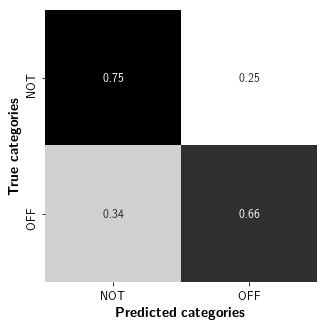

In [11]:
# Plot confusion matrix for subtask A
c.plot_confusion_matrix(confusion_df_sub_a)

# Subtask B

In [3]:
# Read in the start-kit training set into a pandas dataframe
# - Note: the file path has to be an absolute path from the current file
dataframe = dp.tsv_to_dataframe(
    '../data/raw/OffensEval2019/start-kit/training-v1/offenseval-training-v1.tsv')
# Drop NULL Rows (where subtask_a categorized as 'NOT')
dataframe = dp.remove_rows_where_column_is_NULL(dataframe=dataframe, column_name='subtask_b')
# # Transform 'UNT' to 0, and 'TIN' to 1
dataframe = dp.transform_class_column_to_ints(
    dataframe=dataframe, 
    column_name='subtask_b',
    mapping={'UNT': 0, 'TIN': 1},
)

# # Extract X, y and feature names for subtask B
X, y, feature_names = dp.get_X_y_feature_names(
    dataset=dataframe, 
    tweet_column_name='tweet',
    y_column_name='subtask_b',
)
print(X[0], y[0], feature_names[0])

/Users/gudbjartursigurbergsson/PythonEnv/thesis/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['b', 'c', 'e', 'f', 'g', 'h', 'j', 'l', 'n', 'p', 'r', 'u', 'v', 'w'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


0       0.000000
1       0.000000
2       0.000000
3       1.335791
4       0.000000
5       2.671581
6       1.335791
7       1.335791
8       0.000000
9       1.335791
10      1.335791
11      0.000000
12      1.335791
13      4.007372
14      1.335791
15      1.335791
16      0.000000
17      2.671581
18      0.000000
19      0.000000
20      1.335791
21      0.000000
22      1.335791
23      2.671581
24      1.335791
25      1.335791
26      1.335791
27      0.000000
28      1.335791
29      1.335791
          ...   
4370    2.671581
4371    1.335791
4372    4.007372
4373    4.007372
4374    1.335791
4375    2.671581
4376    1.335791
4377    2.671581
4378    2.671581
4379    1.335791
4380    2.671581
4381    4.007372
4382    1.335791
4383    5.343163
4384    1.335791
4385    5.343163
4386    1.335791
4387    1.335791
4388    1.335791
4389    1.335791
4390    1.335791
4391    0.000000
4392    4.007372
4393    1.335791
4394    0.000000
4395    8.014744
4396    0.000000
4397    2.6715

In [4]:
# Train a model on the whole training dataset
model, X_ = c.fit(X, y)

/Users/gudbjartursigurbergsson/PythonEnv/thesis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gudbjartursigurbergsson/PythonEnv/thesis/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/gudbjartursigurbergsson/PythonEnv/thesis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [5]:
# Get Predicted y's
y_pred = c.predict(X_, model)

In [6]:
# Calculate some metrics..
confusion_df_sub_b = c.confusion_matrix(
    y_true=y,
    y_pred=y_pred,
    num_categories=2,
    names=['UNT', 'TIN'],
)
f1_score_sub_b = c.f1_score(y, y_pred)
recall_sub_b = c.recall(y, y_pred)
precision_sub_b = c.precision(y, y_pred)
accuracy_sub_b = c.accuracy(y, y_pred)
print("F1: {}, Recall: {}, Precision: {}, Accuracy: {}".format(
    f1_score_sub_b,
    recall_sub_b, 
    precision_sub_b,
    accuracy_sub_b,
))

F1: [0.31406314 0.73699104], Recall: [0.73091603 0.60474716], Precision: [0.2        0.94325956], Accuracy: 0.6197727272727273


In [7]:
# Create and print a report
report = classification_report(y, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.20      0.73      0.31       524
           1       0.94      0.60      0.74      3876

   micro avg       0.62      0.62      0.62      4400
   macro avg       0.57      0.67      0.53      4400
weighted avg       0.85      0.62      0.69      4400



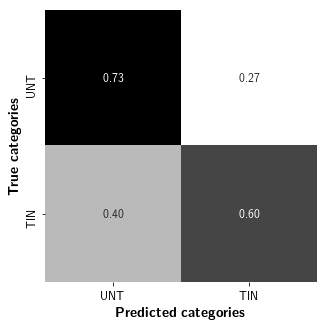

In [8]:
# Plot confusion matrix for subtask B
c.plot_confusion_matrix(confusion_df_sub_b)

# Subtask C

In [4]:
# Read in the start-kit training set into a pandas dataframe
# - Note: the file path has to be an absolute path from the current file
dataframe = dp.tsv_to_dataframe(
    '../data/raw/OffensEval2019/start-kit/training-v1/offenseval-training-v1.tsv')
# Drop NULL Rows (where subtask_a categorized as 'NOT')
dataframe = dp.remove_rows_where_column_is_NULL(dataframe=dataframe, column_name='subtask_c')
dataframe = dp.transform_class_column_to_ints(
    dataframe=dataframe, 
    column_name='subtask_c',
    mapping={'IND': 0, 'GRP': 1, 'OTH': 2},
)
# # Extract X, y and feature names for subtask C
X, y, feature_names = dp.get_X_y_feature_names(
    dataset=dataframe, 
    tweet_column_name='tweet',
    y_column_name='subtask_c',
)
print(X[0], y[0], feature_names[0])

/Users/gudbjartursigurbergsson/PythonEnv/thesis/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['b', 'c', 'e', 'f', 'g', 'h', 'j', 'l', 'n', 'p', 'r', 'u', 'v', 'w'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


KeyError: 0

['b', 'b b', 'b b c', 'b b e', 'b b h', 'b b l', 'b b n', 'b b u', 'b b w', 'b c', 'b c c', 'b c e', 'b c h', 'b c k', 'b c l', 'b c n', 'b c r', 'b c u', 'b c w', 'b e', 'b e b', 'b e c', 'b e e', 'b e f', 'b e g', 'b e h', 'b e k', 'b e l', 'b e n', 'b e p', 'b e r', 'b e u', 'b e v', 'b e w', 'b f', 'b f e', 'b f h', 'b f r', 'b f u', 'b g', 'b g b', 'b g c', 'b g e', 'b g f', 'b g g', 'b g h', 'b g l', 'b g n', 'b g r', 'b g u', 'b g v', 'b g w', 'b h', 'b h c', 'b h e', 'b h g', 'b h h', 'b h l', 'b h n', 'b h p', 'b h r', 'b h u', 'b h v', 'b h w', 'b j', 'b j e', 'b k', 'b k b', 'b k e', 'b k h', 'b k n', 'b k r', 'b l', 'b l b', 'b l c', 'b l e', 'b l f', 'b l g', 'b l h', 'b l k', 'b l l', 'b l n', 'b l p', 'b l r', 'b l u', 'b l w', 'b n', 'b n b', 'b n c', 'b n e', 'b n f', 'b n g', 'b n h', 'b n k', 'b n l', 'b n n', 'b n p', 'b n r', 'b n u', 'b n w', 'b p', 'b p e', 'b p l', 'b p p', 'b p r', 'b r', 'b r b', 'b r c', 'b r e', 'b r f', 'b r g', 'b r h', 'b r k', 'b r l', '

In [8]:
# Train a model on the whole training dataset
model, X_ = c.fit(X, y)

/Users/gudbjartursigurbergsson/PythonEnv/thesis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gudbjartursigurbergsson/PythonEnv/thesis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/gudbjartursigurbergsson/PythonEnv/thesis/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/gudbjartursigurbergsson/PythonEnv/thesis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this wa

In [9]:
# Get Predicted y's
y_pred = c.predict(X_, model)

In [10]:
# Calculate some metrics..
confusion_df_sub_c = c.confusion_matrix(
    y_true=y,
    y_pred=y_pred,
    num_categories=3,
    names=['IND', 'GRP', 'OTH'],
)
f1_score_sub_c = c.f1_score(y, y_pred)
recall_sub_c = c.recall(y, y_pred)
precision_sub_c = c.precision(y, y_pred)
accuracy_sub_c = c.accuracy(y, y_pred)
print("F1: {}, Recall: {}, Precision: {}, Accuracy: {}".format(
    f1_score_sub_c,
    recall_sub_c, 
    precision_sub_c,
    accuracy_sub_c,
))

F1: [0.76331878 0.56078249 0.33365854], Recall: [0.72621521 0.56052142 0.43291139], Precision: [0.80441786 0.5610438  0.27142857], Accuracy: 0.6504127966976264


In [11]:
# Create and print a report
report = classification_report(y, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.80      0.73      0.76      2407
           1       0.56      0.56      0.56      1074
           2       0.27      0.43      0.33       395

   micro avg       0.65      0.65      0.65      3876
   macro avg       0.55      0.57      0.55      3876
weighted avg       0.68      0.65      0.66      3876



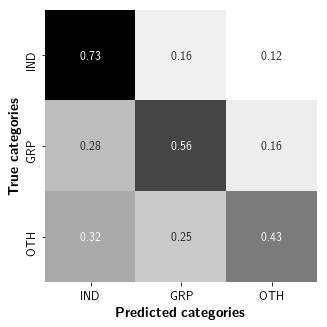

In [12]:
# Plot confusion matrix for subtask B
c.plot_confusion_matrix(confusion_df_sub_c)